https://programmers.co.kr/learn/courses/30/lessons/42861

## 문제 설명
n개의 섬 사이에 다리를 건설하는 비용(costs)이 주어질 때, 최소의 비용으로 모든 섬이 서로 통행 가능하도록 만들 때 필요한 최소 비용을 return 하도록 solution을 완성하세요.

다리를 여러 번 건너더라도, 도달할 수만 있으면 통행 가능하다고 봅니다. 예를 들어 A 섬과 B 섬 사이에 다리가 있고, B 섬과 C 섬 사이에 다리가 있으면 A 섬과 C 섬은 서로 통행 가능합니다.

## 제한사항
- 섬의 개수 n은 1 이상 100 이하입니다.
- costs의 길이는 ((n-1) * n) / 2이하입니다.
- 임의의 i에 대해, costs[i][0] 와 costs[i] [1]에는 다리가 연결되는 두 섬의 번호가 들어있고, costs[i] [2]에는 이 두 섬을 연결하는 다리를 건설할 때 드는 비용입니다.
- 같은 연결은 두 번 주어지지 않습니다. 또한 순서가 바뀌더라도 같은 연결로 봅니다. 즉 0과 1 사이를 연결하는 비용이 주어졌을 때, 1과 0의 비용이 주어지지 않습니다.
- 모든 섬 사이의 다리 건설 비용이 주어지지 않습니다. 이 경우, 두 섬 사이의 건설이 불가능한 것으로 봅니다.
- 연결할 수 없는 섬은 주어지지 않습니다.

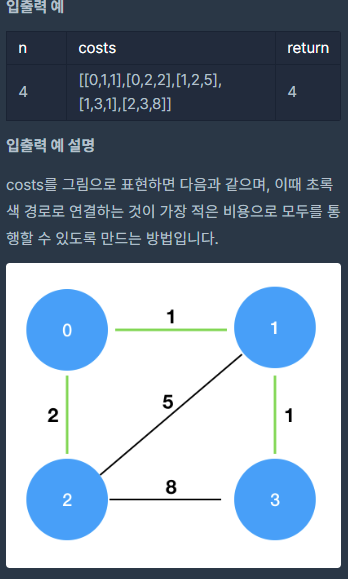

In [4]:
n = 4
costs = [[0,1,1],[0,2,2],[1,2,5],[1,3,1],[2,3,8]]
# 4

In [6]:
costs.sort(key=lambda x:x[2]) # 비용 기준으로 오름차순 정렬
costs

[[0, 1, 1], [1, 3, 1], [0, 2, 2], [1, 2, 5], [2, 3, 8]]

In [15]:
from itertools import combinations
for cb in combinations(costs, n-1): # n-1개의 노드가 필요함 
    islands = [-1] * n # n개의 섬의 방문 확인
    total_cost = 0 # 총 비용 변수
    for cost in cb:
        islands[cost[0]] += 1 # 해당 노드가 방문하는 섬 ++
        islands[cost[1]] += 1 # 해당 노드가 방문하는 섬 ++
        total_cost += cost[2] # 비용 ++
    if islands.count(-1) == 0: # 모든 섬을 방문한 경우
        break
total_cost

4

In [14]:
for cb in combinations(costs, n-1): # n-1개의 노드가 필요함 
    print(cb)

([0, 1, 1], [1, 3, 1], [0, 2, 2])
([0, 1, 1], [1, 3, 1], [1, 2, 5])
([0, 1, 1], [1, 3, 1], [2, 3, 8])
([0, 1, 1], [0, 2, 2], [1, 2, 5])
([0, 1, 1], [0, 2, 2], [2, 3, 8])
([0, 1, 1], [1, 2, 5], [2, 3, 8])
([1, 3, 1], [0, 2, 2], [1, 2, 5])
([1, 3, 1], [0, 2, 2], [2, 3, 8])
([1, 3, 1], [1, 2, 5], [2, 3, 8])
([0, 2, 2], [1, 2, 5], [2, 3, 8])


solution

In [16]:
def solution(n, costs):
    costs.sort(key=lambda x:x[2]) # 비용 기준으로 오름차순 정렬
    from itertools import combinations
    for cb in combinations(costs, n-1): # n-1개의 노드가 필요함
        print(cb)
        islands = [-1] * n # n개의 섬의 방문 확인
        total_cost = 0 # 총 비용 변수
        for cost in cb:
            islands[cost[0]] += 1 # 해당 노드가 방문하는 섬 체크
            islands[cost[1]] += 1 # 해당 노드가 방문하는 섬 체크
            total_cost += cost[2] # 비용 ++
            
        print(islands)
        if islands.count(-1) == 0: # 모든 섬을 방문한 경우
            return total_cost


In [10]:
def solution(n, costs):
    costs.sort(key=lambda x:x[2]) # 비용 기준으로 오름차순 정렬
    from itertools import combinations
    for cb in combinations(costs, n-1): # n-1개의 노드가 필요함
        print(cb)
        islands = [-1] * n # n개의 섬의 방문 확인
        total_cost = 0 # 총 비용 변수
        for cost in cb:
            islands[cost[0]] == 1 # 해당 노드가 방문하는 섬 체크
            islands[cost[1]] == 1 # 해당 노드가 방문하는 섬 체크
            total_cost += cost[2] # 비용 ++
            
        print(islands)
        if islands.count(1) == n: # 모든 섬을 방문한 경우
            return total_cost


solution - 섬의 번호가 꼭 0~n-1 번이라는 보장이 없음

Kruskal 알고리즘 사용
- Kruskal 알고리즘 : 탐욕법을 이요하여 네트워크의 정점을 최소비용으로 연결
- 핵심은 사이클이 생성되지 않게 하는 것
- 간선의 양끝점이 같은 집합에 속하지 않는 것


In [69]:
n = 4
costs =  [[10,11,1],[10,5,2],[11,5,5],[11,300,1],[5,300,8]]

In [70]:
def solution(n, costs):
    costs.sort(key=lambda x:x[2]) # 비용 기준으로 오름차순 정렬
    routes = set([costs[0][0]]) # 집합
    answer = 0
    while len(routes) != n:
        for i, cost in enumerate(costs):
            print(i, cost)
            if cost[0] in routes and cost[1] in routes:
                continue
            if cost[0] in routes or cost[1] in routes:
                routes.update([cost[0], cost[1]])
                answer += cost[2]
                costs[i] = [-1,-1,-1]
                break
    return answer

In [71]:
solution(n, costs)

0 [10, 11, 1]
0 [-1, -1, -1]
1 [11, 300, 1]
0 [-1, -1, -1]
1 [-1, -1, -1]
2 [10, 5, 2]


4